## データをmikasa/dataに移植

In [2]:
# ./../data/race_data_1_6000.csv からデータを取得
import pandas as pd
import glob

# レーステーブルの読み込み
race_table = pd.read_csv('./../data/race_table/combined.csv')
race_table.to_csv('./data/race_table.csv', index=False)

# 馬データの読み込み
path = './../data/race_data_1_6000/*.csv'
all_files = glob.glob(path)
dataflames = [pd.read_csv(f) for f in all_files]
combined_data = pd.concat(dataflames)
combined_data.to_csv('./data/horse_table.csv', index=False)

In [4]:
# データの読み込み
import pandas as pd

race_table = pd.read_csv('./data/race_table.csv')
horse_table = pd.read_csv('./data/horse_table.csv')

race_table.head(10)

,Code,Date,Track,Weather,Race Number,Distance,Condition,Time,Jockey,Trainer,first_horses,second_horses,third_horses
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.024361e+11,2024/09/30,水沢,晴,1.0,ダ850,良,0:52.8,鈴木祐,飯田弘道,ハッシュタグ,スカイルーク,ルクスリベリオン
2,2.024361e+11,2024/09/30,水沢,晴,2.0,ダ850,良,0:51.5,菅原辰徳,佐々木由,ミルキー,ユキノマツシマ,ドラマ
3,2.024361e+11,2024/09/30,水沢,晴,3.0,ダ1400,良,1:29.8,坂口裕一,千葉幸喜,マイジュネス,オウケンアマゾネス,デンジャーマン
4,2.024361e+11,2024/09/30,水沢,晴,4.0,ダ1400,良,1:30.0,小林凌,飯田弘道,リョウガ,フルールエトワール,タイガ
5,2.024361e+11,2024/09/30,水沢,晴,5.0,ダ1400,良,1:31.3,高橋悠里,佐々木由,シャイニーブランコ,タイムトゥゴー,サクラトップキセキ
6,2.024361e+11,2024/09/30,水沢,晴,6.0,ダ1300,良,1:23.5,高松亮,佐藤雅彦,ロックオブソシジ,ベノワ,サクラサンティエ
7,2.024361e+11,2024/09/30,水沢,晴,7.0,ダ1300,良,1:24.7,山本政聡,工藤裕孝,ジャヴァネ,カミノケンシン,ジーティーロッソ
8,2.024361e+11,2024/09/30,水沢,晴,8.0,ダ1300,良,1:23.5,菅原辰徳,小林俊彦,ポジティブスピン,ロンギングキイ,ダイヤモンドアツシ
9,2.024361e+11,2024/09/30,水沢,晴,9.0,ダ1600,良,1:44.5,山本聡哉,酒井仁,ロワマージュ,ハクシンパーソナル,アドマイヤハイジ


In [5]:
# raceテーブルとhorseテーブルで重複する部分は削除
# Time, Jockey, Trainer, first_horses, second_horses, third_horsesは削除 
race_table = race_table.drop(['Time', 'Jockey', 'Trainer', 'first_horses', 'second_horses', 'third_horses'], axis=1)

race_table.dropna(subset=['Code'], inplace=True)
# race_table['Code']をint型に変換
race_table = race_table.astype({'Code': int})
race_table.head(10)

,Code,Date,Track,Weather,Race Number,Distance,Condition
1,202436093001,2024/09/30,水沢,晴,1.0,ダ850,良
2,202436093002,2024/09/30,水沢,晴,2.0,ダ850,良
3,202436093003,2024/09/30,水沢,晴,3.0,ダ1400,良
4,202436093004,2024/09/30,水沢,晴,4.0,ダ1400,良
5,202436093005,2024/09/30,水沢,晴,5.0,ダ1400,良
6,202436093006,2024/09/30,水沢,晴,6.0,ダ1300,良
7,202436093007,2024/09/30,水沢,晴,7.0,ダ1300,良
8,202436093008,2024/09/30,水沢,晴,8.0,ダ1300,良
9,202436093009,2024/09/30,水沢,晴,9.0,ダ1600,良
10,202436093010,2024/09/30,水沢,晴,10.0,ダ1600,良


In [6]:
# horse_table の Code カラムが欠損しているデータを削除
horse_table = horse_table.dropna(subset=['Code'])
race_table = race_table.dropna(subset=['Code'])

# Codeが12桁未満のデータを削除
horse_table = horse_table[horse_table['Code'] > 99999999999]
race_table = race_table[race_table['Code'] > 99999999999]

In [7]:

# Codeが10桁未満のデータを表示
horse_table[horse_table['Code'] < 9999999999]

,Code,Rank,Frame Rank,Horse Number,Horse Name,Sex/Age,Kinryou,Jockey,Time,Chakusa,Tsuuka,Nobori,Tansyou,Ninki,Horse Weight,Trainer,Banushi,Shoukin


In [8]:
# race_table の　Code カラムを用いて horse_table と結合
merged_table = pd.merge(horse_table, race_table, on='Code', how='left')

# Codeカラムが無いデータを削除
merged_table = merged_table.dropna(subset=['Code'])


In [6]:
merged_table.head()

merged_table.to_csv('./data/merged_table.csv', index=False)

In [1]:
import pandas as pd

merged_table = pd.read_csv('./data/merged_table.csv')

/tmp/ipykernel_44354/168902723.py:3: DtypeWarning: Columns (1,12) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_table = pd.read_csv('./data/merged_table.csv')


In [9]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902518 entries, 0 to 5902517
Data columns (total 24 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Code          int64  
 1   Rank          object 
 2   Frame Rank    float64
 3   Horse Number  int64  
 4   Horse Name    object 
 5   Sex/Age       object 
 6   Kinryou       float64
 7   Jockey        object 
 8   Time          object 
 9   Chakusa       object 
 10  Tsuuka        object 
 11  Nobori        float64
 12  Tansyou       object 
 13  Ninki         float64
 14  Horse Weight  object 
 15  Trainer       object 
 16  Banushi       object 
 17  Shoukin       object 
 18  Date          object 
 19  Track         object 
 20  Weather       object 
 21  Race Number   float64
 22  Distance      object 
 23  Condition     object 
dtypes: float64(5), int64(2), object(17)
memory usage: 1.1+ GB


In [10]:
# rank に、数字以外のデータがあれば表示
merged_table['Rank'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '失', '15', '16', '17', '18', '12(降)', '18(降)', '9(降)',
       '10(降)', '2(降)', '3(降)', '7(降)', '14(降)', '4(降)', '16(降)', '11(降)',
       '8(降)', '13(降)', '5(降)', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0',
       '15.0', '16.0', '17.0', '18.0', nan, '6(降)', '15(降)', '19', '20',
       '7(再)', '17(降)', '12(再)', '16(再)', '8(再)', '11(再)', '9(再)', '5(再)'],
      dtype=object)

In [11]:
# Disqualification(失格)カラムを作成し、rankが"失"の場合は1、それ以外は0
merged_table['Disqualification'] = 0
merged_table.loc[merged_table['Rank'] == '失', 'Disqualification'] = 1

# rankが"失"のカラムは999に変更
merged_table.loc[merged_table['Rank'] == '失', 'Rank'] = 999

# rankカラムについて、数字以外のデータ（10(降)）などは、数字以外の情報は削除
# 10(降) -> 10 半角数字以外の文字があれば、それ以降を削除
merged_table['Rank'] = merged_table['Rank'].str.extract('(\d+)')

# rankカラムをint型に変換　nanは999に変換
merged_table['Rank'] = merged_table['Rank'].fillna(999).astype(int)
merged_table = merged_table.astype({'Rank': int})

# 0 は 999 に変換
merged_table.loc[merged_table['Rank'] == 0, 'Rank'] = 999

merged_table['Rank'].unique()


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14, 999,  15,  16,  17,  18,  19,  20])

In [12]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902518 entries, 0 to 5902517
Data columns (total 25 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Code              int64  
 1   Rank              int64  
 2   Frame Rank        float64
 3   Horse Number      int64  
 4   Horse Name        object 
 5   Sex/Age           object 
 6   Kinryou           float64
 7   Jockey            object 
 8   Time              object 
 9   Chakusa           object 
 10  Tsuuka            object 
 11  Nobori            float64
 12  Tansyou           object 
 13  Ninki             float64
 14  Horse Weight      object 
 15  Trainer           object 
 16  Banushi           object 
 17  Shoukin           object 
 18  Date              object 
 19  Track             object 
 20  Weather           object 
 21  Race Number       float64
 22  Distance          object 
 23  Condition         object 
 24  Disqualification  int64  
dtypes: float64(5), int64(4), object(16)
memory us

In [6]:
# merged_table2.csv として保存
merged_table.to_csv('./data/merged_table2.csv', index=False)

In [1]:
import pandas as pd
merged_table = pd.read_csv('./data/merged_table2.csv')

/tmp/ipykernel_1683/108167436.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_table = pd.read_csv('./data/merged_table2.csv')


In [2]:
print(merged_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5902518 entries, 0 to 5902517
Data columns (total 25 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Code              int64  
 1   Rank              int64  
 2   Frame Rank        float64
 3   Horse Number      int64  
 4   Horse Name        object 
 5   Sex/Age           object 
 6   Kinryou           float64
 7   Jockey            object 
 8   Time              object 
 9   Chakusa           object 
 10  Tsuuka            object 
 11  Nobori            float64
 12  Tansyou           object 
 13  Ninki             float64
 14  Horse Weight      object 
 15  Trainer           object 
 16  Banushi           object 
 17  Shoukin           object 
 18  Date              object 
 19  Track             object 
 20  Weather           object 
 21  Race Number       float64
 22  Distance          object 
 23  Condition         object 
 24  Disqualification  int64  
dtypes: float64(5), int64(4), object(16)
memory us

In [13]:
# erged_table['Frame Rank']　をint型に変換
merged_table = merged_table.astype({'Frame Rank': int})

In [14]:
merged_table['Sex/Age'].unique()

array(['牡4', '牡3', 'セ6', '牡6', '牡5', '牡7', '牝3', '牝4', '牝6', '牝5', 'セ3',
       'セ7', '牝7', 'セ4', '牡9', '牡8', '牝2', '牡2', 'セ8', 'セ5', '牝8', '牡10',
       'セ9', '牡11', '牝9', '牝10', 'セ2', '牡14', 'セ10', 'セ11', '牡12', '牡13',
       'セ12', '牝11', 'セ13', '牝12', '牝14', '牝18', '牡15', 'ВД4', 'ЬЦ5',
       'ВД6', 'ЬЦ4', 'ЬЦ6', 'セ15', '牝13', 'セ14', '牡16', 'ЅЛ5', 'ВД5',
       '≤ī2', 'Ő∆2', '牝17', '牝16', 'ВД3', 'ЬЦ3', '≤¥4', '≤¥5', 'ΧΤ4',
       'ΧΤ5', '≤¥9', 'ΧΤ8', 'МЖ3', 'Іҙ3', 'ĢĘ3', '²“3', 'ВД8', 'ЅЛ8',
       'ВД7', 'ВД9', 'ΧΤ7', 'ЅЛ3', '牝15', 'ЬЦ8', 'ЬЦ2', 'ВД2', 'ÌÆ2',
       'ČŽ2', 'МЖ4', 'Ҙ»6', 'Іҙ5', 'Ҙ»7', 'МЖ6', 'Іҙ4', 'МЖ5', 'Іҙ6',
       'МЖ7', 'Іҙ8', 'ЅЛ4', 'ЬЦ7', 'ΧΤ2', '≤¥2', 'ΞΜ2', '≤¥3', 'ΞΜ5',
       'ΧΤ3', 'ÌÆ4', 'ÌÆ9', '„»10', 'ČŽ5', 'ÌÆ5', '3', '5', '4', '7', '6',
       '10', 'ЅЛ7', '²“4', 'ĢĘ6', 'ĢĘ7', '²“11', 'ĢĘ4', 'ĢĘ5', '„»7',
       'ВД10', 'ЬЦ10', 'ЬЦ9', '唐3', '泊3', 'ЅЛ6', 'ČŽ3', 'ÌÆ3', '„»3',
       'ЅЛ2', 'ΞΜ3', 'ČŽ7', '„»4', 'ČŽ4', 'Іҙ7', 'Іҙ11', 'Ҙ»5', '牝19',
   

In [15]:
# merged_table['Sex/Age']に牡、牝、セ以外のデータを持つrowはすべて削除
merged_table = merged_table[merged_table['Sex/Age'].str.startswith(('牡', '牝', 'セ'))]


In [16]:
merged_table['Sex/Age'].unique()

array(['牡4', '牡3', 'セ6', '牡6', '牡5', '牡7', '牝3', '牝4', '牝6', '牝5', 'セ3',
       'セ7', '牝7', 'セ4', '牡9', '牡8', '牝2', '牡2', 'セ8', 'セ5', '牝8', '牡10',
       'セ9', '牡11', '牝9', '牝10', 'セ2', '牡14', 'セ10', 'セ11', '牡12', '牡13',
       'セ12', '牝11', 'セ13', '牝12', '牝14', '牝18', '牡15', 'セ15', '牝13',
       'セ14', '牡16', '牝17', '牝16', '牝15', '牝19'], dtype=object)

In [17]:
# merged_table['Sex/Age']の先頭の文字が牡なら1、牝なら2、セなら3にとし、Sexカラムに格納
# 同時に、二文字目以降の数字をAgeカラムに格納

merged_table['Sex'] = merged_table['Sex/Age'].apply(lambda x: 1 if x[0] == '牡' else 2 if x[0] == '牝' else 3)
merged_table['Age'] = merged_table['Sex/Age'].apply(lambda x: int(x[1:]))

merged_table = merged_table.drop(['Sex/Age'], axis=1)

In [10]:
merged_table.to_csv('./data/merged_table3.csv', index=False)


In [11]:
import pandas as pd

merged_table = pd.read_csv('./data/merged_table3.csv')

/tmp/ipykernel_1683/4170142335.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_table = pd.read_csv('./data/merged_table3.csv')


In [18]:
merged_table.isnull().sum()

Code                      0
Rank                      0
Frame Rank                0
Horse Number              0
Horse Name                0
Kinryou                   0
Jockey                    0
Time                      0
Chakusa              905664
Tsuuka              1076745
Nobori              2029826
Tansyou                   0
Ninki                    46
Horse Weight              0
Trainer                   0
Banushi               96709
Shoukin             3174926
Date                  14007
Track                 14007
Weather               14096
Race Number           14007
Distance              14007
Condition            401826
Disqualification          0
Sex                       0
Age                       0
dtype: int64

In [19]:
# Dateが欠損しているデータを削除
merged_table = merged_table.dropna(subset=['Date'])

In [23]:
merged_table.to_csv('./data/merged_table4.csv', index=False)

In [8]:
import pandas as pd
merged_table = pd.read_csv('./data/merged_table4.csv')

/tmp/ipykernel_39091/1806848558.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_table = pd.read_csv('./data/merged_table4.csv')


In [20]:
merged_table.isnull().sum()

Code                      0
Rank                      0
Frame Rank                0
Horse Number              0
Horse Name                0
Kinryou                   0
Jockey                    0
Time                      0
Chakusa              904084
Tsuuka              1072605
Nobori              2021595
Tansyou                   0
Ninki                    46
Horse Weight              0
Trainer                   0
Banushi               96709
Shoukin             3167645
Date                      0
Track                     0
Weather                  89
Race Number               0
Distance                  0
Condition            387819
Disqualification          0
Sex                       0
Age                       0
dtype: int64

In [21]:
# merged_table['Weather']のnullを'晴'で埋める
merged_table['Weather'] = merged_table['Weather'].fillna('晴')

In [22]:
# nullを削除し、int型に変換
merged_table['Ninki'] = merged_table['Ninki'].dropna().astype(int)

In [12]:
merged_table.to_csv('./data/merged_table5.csv', index=False)

In [13]:
import pandas as pd
merged_table = pd.read_csv('./data/merged_table5.csv')

/tmp/ipykernel_39091/216953146.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_table = pd.read_csv('./data/merged_table5.csv')


In [23]:
print(merged_table.isnull().sum())

Code                      0
Rank                      0
Frame Rank                0
Horse Number              0
Horse Name                0
Kinryou                   0
Jockey                    0
Time                      0
Chakusa              904084
Tsuuka              1072605
Nobori              2021595
Tansyou                   0
Ninki                    46
Horse Weight              0
Trainer                   0
Banushi               96709
Shoukin             3167645
Date                      0
Track                     0
Weather                   0
Race Number               0
Distance                  0
Condition            387819
Disqualification          0
Sex                       0
Age                       0
dtype: int64


In [24]:
# distanceカラムを修正
# array(['ダ800', 'ダ1400', 'ダ1600', 'ダ1800', ' 200', 'ダ1700', 'ダ1300',

#　先頭の文字がダの場合はtrack typeカラムに”ダート”、先頭の文字が芝の場合は”芝”を、障の場合は”障害”を格納
# その後、数字のみをdistanceカラムに格納
merged_table['Track Type'] = merged_table['Distance'].apply(lambda x: 'ダート' if x[0] == 'ダ' else '芝' if x[0] == '芝' else '障害')
merged_table['Distance'] = merged_table['Distance'].str.extract('(\d+)')

In [25]:
# merged_table['Distance']をint型に変換
merged_table = merged_table.astype({'Distance': int})

In [26]:
# race numberをint型に変換
merged_table = merged_table.astype({'Race Number': int})

merged_table['Race Number'].unique()

array([12,  8, 10,  9,  4,  7,  1, 11,  3,  2,  5,  6])

In [18]:
merged_table.to_csv('./data/merged_table6.csv', index=False)

In [1]:
import pandas as pd
merged_table = pd.read_csv('./data/merged_table6.csv')

/tmp/ipykernel_20685/3129932437.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_table = pd.read_csv('./data/merged_table6.csv')


In [27]:
# tsuukaカラム
# ['1-1', '2-2', '4-4', ..., '18-15-8-7', '4-10-15', '15-15-14-3']
# 最初の文字を取得し、int型に変換し、intermediate_rank_1カラムに格納
# その後、ハイフン - の次の
merged_table['Tsuuka'].unique()

array(['3-5-6-5', '7-8-8-7', '5-7-6-6', ..., '13-10-12-8', '4-8-12-15',
       '14-15-7-10'], dtype=object)

In [2]:
# # ['1-1', '2-2', '4-4', ..., '18-15-8-7', '4-10-15', '15-15-14-3']

# def split_ranks(rank_string):
#     if pd.isna(rank_string) or rank_string is None:
#         return [None, None, None, None]
#     elif '-' in rank_string:
#         arr = rank_string.split('-')
#         return [int(arr[0]), int(arr[1]), int(arr[2]) if len(arr) > 2 else None, int(arr[3]) if len(arr) > 3 else None]

# merged_table[['intermediate_rank_1', 'intermediate_rank_2', 'intermediate_rank_3', 'intermediate_rank_4']] = merged_table['Tsuuka'].apply(lambda x: pd.Series(split_ranks(x)))

KeyboardInterrupt: 

In [28]:
# 'Tsuuka' 列を '-' で分割し、最大で4列まで展開
expanded_ranks = merged_table['Tsuuka'].str.split('-', n=3, expand=True)

# 列を適切な型（整数）に変換し、欠損値を設定
for col in expanded_ranks.columns:
    expanded_ranks[col] = pd.to_numeric(expanded_ranks[col], errors='coerce')

# 列名を設定し、元のデータフレームに結合
expanded_ranks.columns = ['intermediate_rank_1', 'intermediate_rank_2', 'intermediate_rank_3', 'intermediate_rank_4']
merged_table = pd.concat([merged_table, expanded_ranks], axis=1)

In [5]:
merged_table.to_csv('./data/merged_table7.csv', index=False)

In [28]:
import pandas as pd
merged_table = pd.read_csv('./data/merged_table7.csv')

/tmp/ipykernel_20685/1484684617.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_table = pd.read_csv('./data/merged_table7.csv')


In [30]:
# merged_table['Tsuuka']を削除
merged_table = merged_table.drop(['Tsuuka'], axis=1)

In [31]:
# merged_table['intermediate_rank_1', 'intermediate_rank_2', 'intermediate_rank_3', 'intermediate_rank_4']をint型に変換
merged_table['intermediate_rank_1'] = pd.to_numeric(merged_table['intermediate_rank_1'], errors='coerce').astype('Int64')
merged_table['intermediate_rank_2'] = pd.to_numeric(merged_table['intermediate_rank_2'], errors='coerce').astype('Int64')
merged_table['intermediate_rank_3'] = pd.to_numeric(merged_table['intermediate_rank_3'], errors='coerce').astype('Int64')
merged_table['intermediate_rank_4'] = pd.to_numeric(merged_table['intermediate_rank_4'], errors='coerce').astype('Int64')

In [32]:
# merged_table['Tansyou']をfloat型に変換
merged_table['Tansyou'] = pd.to_numeric(merged_table['Tansyou'], errors='coerce')

In [33]:
pd.set_option('display.max_columns', None)
merged_table.head()

,Code,Rank,Frame Rank,Horse Number,Horse Name,Kinryou,Jockey,Time,Chakusa,Nobori,Tansyou,Ninki,Horse Weight,Trainer,Banushi,Shoukin,Date,Track,Weather,Race Number,Distance,Condition,Disqualification,Sex,Age,Track Type,intermediate_rank_1,intermediate_rank_2,intermediate_rank_3,intermediate_rank_4
0,201643120812,1,3,3,カールトンガーデン,57.0,今野忠成,1:50.7,NaN,38.8,7.8,3.0,502(+5),[地]辻野豊,キャロットファーム,260.0,2016/12/08,船橋,晴,12,1700,稍,0,1,4,ダート,3,5,6,5
1,201643120812,2,4,5,キングニミッツ,57.0,石崎駿,1:50.9,3/4,38.6,1.7,1.0,487(-5),[地]矢野義幸,（有）新生ファーム,78.0,2016/12/08,船橋,晴,12,1700,稍,0,1,3,ダート,7,8,8,7
2,201643120812,3,3,4,スティレット,57.0,和田譲治,1:51.0,1/2,39.1,5.4,2.0,465(+1),[地]岡林光浩,ユートピア牧場,52.0,2016/12/08,船橋,晴,12,1700,稍,0,3,6,ダート,5,7,6,6
3,201643120812,4,8,13,ドリームキングダム,57.0,藤井勘一,1:51.3,1.1/2,39.7,19.6,6.0,524(+1),[地]佐々木仁,（株）ドリームター,31.2,2016/12/08,船橋,晴,12,1700,稍,0,1,6,ダート,2,2,4,4
4,201643120812,5,7,12,マサニオニカゲ,55.0,藤江渉,1:51.4,3/4,40.0,43.6,9.0,509(-4),[地]山越光,今成正美,20.8,2016/12/08,船橋,晴,12,1700,稍,0,1,3,ダート,6,4,3,2


In [33]:
merged_table.to_csv('./data/merged_table8.csv', index=False)

In [1]:
import pandas as pd
merged_table = pd.read_csv('./data/merged_table8.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/merged_table8.csv'

In [34]:
# Horse WeightとHorse Weight Change列を抽出
# Horse Weight Change: 括弧内の符号付きの数値を抽出
merged_table['Horse Weight Change'] = merged_table['Horse Weight'].str.extract(r'\(([+-]?\d+)\)')

# Horse Weight: 括弧の外の数値を抽出
merged_table['Horse Weight'] = merged_table['Horse Weight'].str.extract(r'(\d+)\(')

# 数値に変換し、Int64型に変更
merged_table['Horse Weight'] = pd.to_numeric(merged_table['Horse Weight'], errors='coerce').astype('Int64')
merged_table['Horse Weight Change'] = pd.to_numeric(merged_table['Horse Weight Change'], errors='coerce').astype('Int64')

In [35]:
merged_table['Horse Weight Change'].fillna(0, inplace=True)

/tmp/ipykernel_1229/3756687957.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_table['Horse Weight Change'].fillna(0, inplace=True)


In [36]:
# mm:ss形式をhh:mm:ss形式に変換
merged_table['Time'] = merged_table['Time'].apply(lambda x: '00:' + x if len(x.split(':')) == 2 else x)

# 変換後にtimedeltaに変換し、秒数を取得
merged_table['Time'] = pd.to_timedelta(merged_table['Time']).dt.total_seconds()

In [37]:
# [地]山田太郎、[地]田中次郎のような表記について、先頭の括弧の中身を取得
# Trainer's stableカラムに格納
# トレーナーの厩舎名を抽出
merged_table['Trainers Stable'] = merged_table['Trainer'].str.extract(r'\[(.+?)\]', expand=False)

# 括弧の中身を削除
merged_table['Trainer'] = merged_table['Trainer'].str.replace(r'\[.+?\]', '', regex=True)

In [38]:
merged_table.head(10)

,Code,Rank,Frame Rank,Horse Number,Horse Name,Kinryou,Jockey,Time,Chakusa,Nobori,Tansyou,Ninki,Horse Weight,Trainer,Banushi,Shoukin,Date,Track,Weather,Race Number,Distance,Condition,Disqualification,Sex,Age,Track Type,intermediate_rank_1,intermediate_rank_2,intermediate_rank_3,intermediate_rank_4,Horse Weight Change,Trainers Stable
0,201643120812,1,3,3,カールトンガーデン,57.0,今野忠成,110.7,NaN,38.8,7.8,3.0,502,辻野豊,キャロットファーム,260.0,2016/12/08,船橋,晴,12,1700,稍,0,1,4,ダート,3,5,6,5,5,地
1,201643120812,2,4,5,キングニミッツ,57.0,石崎駿,110.9,3/4,38.6,1.7,1.0,487,矢野義幸,（有）新生ファーム,78.0,2016/12/08,船橋,晴,12,1700,稍,0,1,3,ダート,7,8,8,7,-5,地
2,201643120812,3,3,4,スティレット,57.0,和田譲治,111.0,1/2,39.1,5.4,2.0,465,岡林光浩,ユートピア牧場,52.0,2016/12/08,船橋,晴,12,1700,稍,0,3,6,ダート,5,7,6,6,1,地
3,201643120812,4,8,13,ドリームキングダム,57.0,藤井勘一,111.3,1.1/2,39.7,19.6,6.0,524,佐々木仁,（株）ドリームター,31.2,2016/12/08,船橋,晴,12,1700,稍,0,1,6,ダート,2,2,4,4,1,地
4,201643120812,5,7,12,マサニオニカゲ,55.0,藤江渉,111.4,3/4,40.0,43.6,9.0,509,山越光,今成正美,20.8,2016/12/08,船橋,晴,12,1700,稍,0,1,3,ダート,6,4,3,2,-4,地
5,201643120812,6,6,10,トーセンスパンキー,57.0,左海誠二,112.0,3,40.8,61.9,11.0,485,小久保智,島川隆哉,NaN,2016/12/08,船橋,晴,12,1700,稍,0,1,4,ダート,4,3,1,1,-15,地
6,201643120812,7,2,2,ダージーパラダイス,57.0,本田正重,112.0,クビ,39.6,38.8,8.0,494,椎名広明,高岡浩行,NaN,2016/12/08,船橋,晴,12,1700,稍,0,1,6,ダート,11,11,9,8,6,地
7,201643120812,8,5,7,ドミヌス,57.0,服部茂史,112.2,3/4,39.6,10.5,4.0,520,出川克己,（有）サンデーレー,NaN,2016/12/08,船橋,晴,12,1700,稍,0,1,5,ダート,10,12,10,9,-4,地
8,201643120812,9,7,11,テンエイヒーロー,55.0,酒井忍,112.4,1,39.1,68.4,12.0,430,宇野木数,熊坂俊一,NaN,2016/12/08,船橋,晴,12,1700,稍,0,1,7,ダート,13,14,14,12,-2,地
9,201643120812,10,4,6,ボウマンミル,56.0,仲野光馬,112.9,2.1/2,40.2,109.8,13.0,485,佐藤厚弘,菅原俊也,NaN,2016/12/08,船橋,晴,12,1700,稍,0,1,6,ダート,8,9,11,11,8,地


In [39]:
merged_table.dtypes

Code                     int64
Rank                     int64
Frame Rank               int64
Horse Number             int64
Horse Name              object
Kinryou                float64
Jockey                  object
Time                   float64
Chakusa                 object
Nobori                 float64
Tansyou                float64
Ninki                  float64
Horse Weight             Int64
Trainer                 object
Banushi                 object
Shoukin                 object
Date                    object
Track                   object
Weather                 object
Race Number              int64
Distance                 int64
Condition               object
Disqualification         int64
Sex                      int64
Age                      int64
Track Type              object
intermediate_rank_1      Int64
intermediate_rank_2      Int64
intermediate_rank_3      Int64
intermediate_rank_4      Int64
Horse Weight Change      Int64
Trainers Stable         object
dtype: o

In [40]:
merged_table['Trainers Stable'].fillna('他', inplace=True)

/tmp/ipykernel_1229/3652982973.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_table['Trainers Stable'].fillna('他', inplace=True)


In [41]:
# intermediate_rank_1    float64
# intermediate_rank_2    float64
# intermediate_rank_3    float64
# intermediate_rank_4    float64 をnan はnanのままでint型に変換

merged_table['intermediate_rank_1'] = merged_table['intermediate_rank_1'].astype('Int64')
merged_table['intermediate_rank_2'] = merged_table['intermediate_rank_2'].astype('Int64')
merged_table['intermediate_rank_3'] = merged_table['intermediate_rank_3'].astype('Int64')
merged_table['intermediate_rank_4'] = merged_table['intermediate_rank_4'].astype('Int64')

In [42]:
# merged_table['Ninki']について、nanはそのまま、int型に変換
merged_table['Ninki'] = merged_table['Ninki'].astype('Int64')

In [43]:
merged_table.head()

,Code,Rank,Frame Rank,Horse Number,Horse Name,Kinryou,Jockey,Time,Chakusa,Nobori,Tansyou,Ninki,Horse Weight,Trainer,Banushi,Shoukin,Date,Track,Weather,Race Number,Distance,Condition,Disqualification,Sex,Age,Track Type,intermediate_rank_1,intermediate_rank_2,intermediate_rank_3,intermediate_rank_4,Horse Weight Change,Trainers Stable
0,201643120812,1,3,3,カールトンガーデン,57.0,今野忠成,110.7,NaN,38.8,7.8,3,502,辻野豊,キャロットファーム,260.0,2016/12/08,船橋,晴,12,1700,稍,0,1,4,ダート,3,5,6,5,5,地
1,201643120812,2,4,5,キングニミッツ,57.0,石崎駿,110.9,3/4,38.6,1.7,1,487,矢野義幸,（有）新生ファーム,78.0,2016/12/08,船橋,晴,12,1700,稍,0,1,3,ダート,7,8,8,7,-5,地
2,201643120812,3,3,4,スティレット,57.0,和田譲治,111.0,1/2,39.1,5.4,2,465,岡林光浩,ユートピア牧場,52.0,2016/12/08,船橋,晴,12,1700,稍,0,3,6,ダート,5,7,6,6,1,地
3,201643120812,4,8,13,ドリームキングダム,57.0,藤井勘一,111.3,1.1/2,39.7,19.6,6,524,佐々木仁,（株）ドリームター,31.2,2016/12/08,船橋,晴,12,1700,稍,0,1,6,ダート,2,2,4,4,1,地
4,201643120812,5,7,12,マサニオニカゲ,55.0,藤江渉,111.4,3/4,40.0,43.6,9,509,山越光,今成正美,20.8,2016/12/08,船橋,晴,12,1700,稍,0,1,3,ダート,6,4,3,2,-4,地


In [50]:
merged_table.to_csv('./data/merged_table_finished.csv', index=False)

In [1]:
import pandas as pd
merged_table = pd.read_csv('./data/merged_table_finished.csv')

In [44]:
merged_table['Track'].unique()

array(['船橋', '笠松', '園田', '金沢', '水沢', '帯広(ば)', '5中山2', '4中京2', '5阪神2',
       '高知', '佐賀', '5中山1', '4中京1', '5阪神1', '大井', '名古屋', '5東京8', '5京都8',
       '5東京7', '5京都7', '浦和', '3福島6', '5東京6', '5京都6', '3福島5', '5東京5',
       '5京都5', '1函館3', '3東京7', '3阪神7', '門別', '1函館2', '3東京6', '3阪神6',
       '1函館1', '3東京5', '3阪神5', '川崎', '3東京4', '3阪神4', '3東京3', '3阪神3',
       '1新潟4', '2東京6', '3京都6', '福山', '荒尾', '1新潟3', '2東京5', '3京都5', '1新潟2',
       '2東京4', '3京都4', '1新潟1', '2東京3', '3京都3', '1福島6', '2東京2', '3京都2',
       '1福島5', '2東京1', '3京都1', '姫路', '札幌(地)', '上山', '中津', '3福島4', '5東京2',
       '5京都2', '盛岡', '三条', '宇都宮', '益田', '旭川(ば)', '3福島3', '5東京1', '5京都1',
       '3福島2', '4東京8', '4京都8', '1函館4', '4京都6', '4京都5', '4京都4', '4京都3',
       '新潟(地)', '5中山6', '4中京8', '6阪神6', '5中山5', '4中京7', '6阪神5', '足利',
       '高崎', '5中山4', '4中京6', '6阪神4', '5中山3', '4中京5', '6阪神3', '3東京2',
       '3阪神2', '3東京1', '3阪神1', '2東京12', '3京都12', '2東京11', '3京都11', '1新潟8',
       '2東京10', '3京都10', '1新潟7', '2東京9', '3京都9', '1東京5', '1京都5', '1東京4',


In [45]:
# 札幌　函館　福島　新潟　東京　中山　中京　京都　阪神　小倉　
# 門別　盛岡　水沢　浦和　船橋　大井　川崎　金沢　笠松　名古屋　園田　姫路　高知　佐賀　帯広(ば)　
# 上の文字列が含まれていれば、その文字列をTrackに格納

merged_table['Track'] = merged_table['Track'].str.extract(r'(札幌|函館|福島|新潟|東京|中山|中京|京都|阪神|小倉|門別|盛岡|水沢|浦和|船橋|大井|川崎|金沢|笠松|名古屋|園田|姫路|高知|佐賀|帯広)')

In [46]:
# merged_table['Track']が欠損している行は削除
merged_table = merged_table.dropna(subset=['Track'])

In [47]:
merged_table.isnull().sum()

Code                         0
Rank                         0
Frame Rank                   0
Horse Number                 0
Horse Name                   0
Kinryou                      0
Jockey                       0
Time                         0
Chakusa                 785844
Nobori                 1482708
Tansyou                1164300
Ninki                       38
Horse Weight              3185
Trainer                      0
Banushi                  75910
Shoukin                2880382
Date                         0
Track                        0
Weather                      0
Race Number                  0
Distance                     0
Condition               330692
Disqualification             0
Sex                          0
Age                          0
Track Type                   0
intermediate_rank_1     867878
intermediate_rank_2     909821
intermediate_rank_3    2100496
intermediate_rank_4    2813733
Horse Weight Change          0
Trainers Stable              0
dtype: i

In [48]:
merged_table.to_csv('./data/merged_table_finished2.csv', index=False)

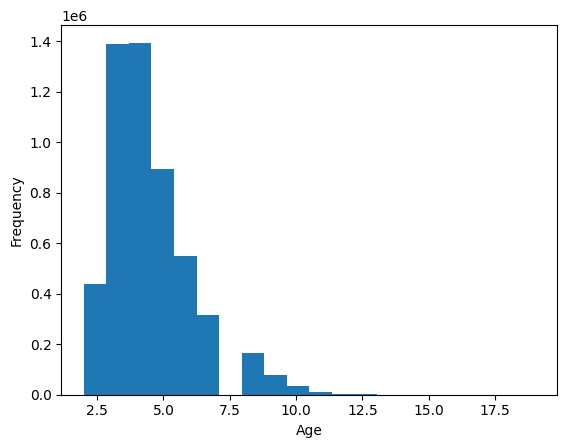

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

merged_table = pd.read_csv('./data/merged_table_finished2.csv')

# merged_table['Age']のヒストグラムを表示
plt.hist(merged_table['Age'], bins=20)
# x,y軸のラベルを設定
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




In [4]:
# Frame Rank,Horse Weight, Track, Sex, Ageと、Rankの相関係数を表示
# merged_tableはdataframe

target_columns = ['Frame Rank', 'Horse Weight', 'Sex', 'Age', 'Rank']


# 相関行列を計算
correlation_matrix = merged_table[target_columns].corr()

# ヒートマップで表示
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# 数値データのみの相関行列を計算・表示する場合
numerical_columns = ['Frame Rank', 'Horse Weight', 'Sex', 'Age', 'Rank']
numerical_correlation_matrix = merged_table[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Numerical Correlation Matrix')
plt.show()

KeyError: "['Track'] not in index"